In [1]:
from tensorflow.keras.datasets import cifar10 # Загружаем базу cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization # Базовые слои для счёрточных сетей
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils # Используем для One Hot Encoding
from tensorflow.keras.preprocessing import image # Для отрисовки изображений

import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Для отрисовки графиков
from PIL import Image # Для работы с изображениями
import random # Для генерации случайных чисел 
import math # Для округления
import os # Для работы с функциями операционной системы

from google.colab import files # Для работы с файлами
from google.colab import drive # Для работы с Google Drive

%matplotlib inline

In [2]:
# Загружаем базу изображений с правильными ответами Cifar10
(x_train, y_train_original), (x_test, y_test_original) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
# Выводим размерности обучающей и тестовой выборки
print("Обучающая выборка:")
print(x_train.shape)
print()

print("Правильные ответы в обучающей выборке:")
print(y_train_original.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print()

print("Правильные ответы в тестовой выборке:")
print(y_test_original.shape)
print()

Обучающая выборка:
(50000, 32, 32, 3)

Правильные ответы в обучающей выборке:
(50000, 1)

Тестовая выборка:
(10000, 32, 32, 3)

Правильные ответы в тестовой выборке:
(10000, 1)



In [4]:
# Определяем названия классов изображений в зависимости от лэйбла
labels = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

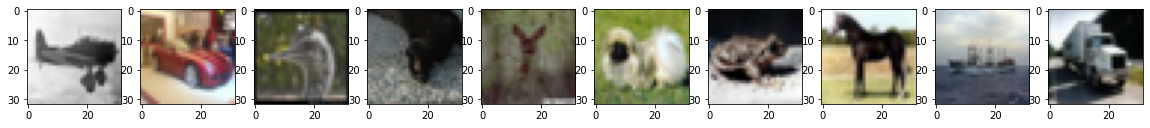

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [5]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_original==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train_original[index][0] # Берем ответ, который записан в 0 эл массива.
  y += str(label) + "("+labels[label]+"); " # Созраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображение i-ым графиков

# Отображаем картинки и соответствующие им лэйблы
plt.show()
print("Правильные ответы:", y)


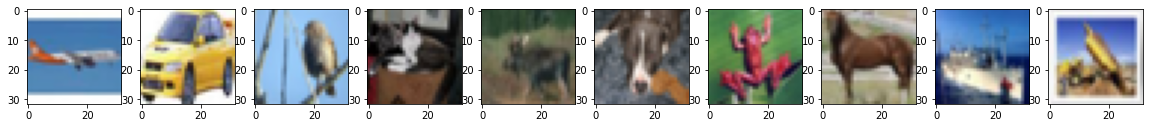

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [6]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_original==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train_original[index][0] # Берем ответ, который записан в 0 эл массива.
  y += str(label) + "("+labels[label]+"); " # Созраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображение i-ым графиков

# Отображаем картинки и соответствующие картинкам лэйблы
plt.show()
print("Правильные ответы:", y)


In [7]:
# Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train_original, 10)
y_test = utils.to_categorical(y_test_original, 10)

print("Обучающая выборка:")
print(y_train_original[5], "->", y_train[5])
print(y_train_original[234], "->", y_train[234])
print(y_train_original[45477], "->", y_train[45477])
print(y_train_original[14848], "->", y_train[14848])
print()

print("Тестовая выборка:")
print(y_train_original[15], "->", y_train[15])
print(y_train_original[334], "->", y_train[334])
print(y_train_original[8477], "->", y_train[8477])
print(y_train_original[3768], "->", y_train[3768])

Обучающая выборка:
[1] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[6] -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[5] -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Тестовая выборка:
[9] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3] -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2] -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[7] -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [8]:
# Разделяем тестовую выборку на проверочную и тестовую
x_val = x_test[0:9000]
y_val = y_test[0:9000]

x_test = x_test[9000:]
y_test = y_test[9000:]


In [9]:
# Проверим еще раз размерности выборотк

print("Обучающая выборка:")
print(x_train.shape)
print(y_train.shape)
print()

print("Проверочная выборка:")
print(x_val.shape)
print(y_val.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print(y_test.shape)

Обучающая выборка:
(50000, 32, 32, 3)
(50000, 10)

Проверочная выборка:
(9000, 32, 32, 3)
(9000, 10)

Тестовая выборка:
(1000, 32, 32, 3)
(1000, 10)


#Обучение н.с.

In [23]:
# задаём batch_size
batch_size = 100

# Я испробовал разный размер окна свёртки. 3х3 даёт лучшие результаты, поэтому оставляю его.

# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3), name="bn0"))

# Подход 1
model.add(BatchNormalization(name = "bn1"))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer1"))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer1"))
model.add(Dropout(0.2, name="Dropout-layer1"))
model.add(BatchNormalization(name = "bn2"))

# Подход 2. Выявляем больше признаков
model.add(BatchNormalization(name = "bn3"))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name="Conv2D-layer3"))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name="Conv2D-layer4"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer2"))
model.add(Dropout(0.2, name="Dropout-layer2"))
model.add(BatchNormalization(name = "bn4"))

# Подход. Выявляем больше признаков
model.add(BatchNormalization(name = "bn5"))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name="Conv2D-layer5"))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name="Conv2D-layer6"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer3"))
model.add(Dropout(0.2, name="Dropout-layer3"))
model.add(BatchNormalization(name = "bn6"))

# Подход. Выявляем больше признаков
model.add(BatchNormalization(name = "bn7"))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name="Conv2D-layer7"))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name="Conv2D-layer8"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer4"))
model.add(Dropout(0.2, name="Dropout-layer4"))
model.add(BatchNormalization(name = "bn8"))

# Подход. Выявляем больше признаков
model.add(BatchNormalization(name = "bn9"))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name="Conv2D-layer9"))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name="Conv2D-layer10"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer5"))
model.add(Dropout(0.2, name="Dropout-layer5"))
model.add(BatchNormalization(name = "bn10"))

# Этот доп. слой BatchNormalization() очень сильно сокращает время необх. для обучения н.с.
model.add(BatchNormalization())
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten(name="flatten"))
# Выходной полносвязный классифицирующий слой
model.add(Dense(10, activation='softmax', name = "labels"))

In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bn0 (BatchNormalization)    (None, 32, 32, 3)         12        
                                                                 
 bn1 (BatchNormalization)    (None, 32, 32, 3)         12        
                                                                 
 Conv2D-layer1 (Conv2D)      (None, 32, 32, 32)        896       
                                                                 
 Conv2D-layer2 (Conv2D)      (None, 32, 32, 32)        9248      
                                                                 
 mp2D-layer1 (MaxPooling2D)  (None, 16, 16, 32)        0         
                                                                 
 Dropout-layer1 (Dropout)    (None, 16, 16, 32)        0         
                                                                 
 bn2 (BatchNormalization)    (None, 16, 16, 32)       

Epoch 1/20
500/500 [==============================] - 9s 15ms/step - loss: 2.0668 - accuracy: 0.2677 - val_loss: 1.7521 - val_accuracy: 0.3221
Epoch 2/20
500/500 [==============================] - 7s 15ms/step - loss: 1.5349 - accuracy: 0.4309 - val_loss: 1.3683 - val_accuracy: 0.5038
Epoch 3/20
500/500 [==============================] - 7s 15ms/step - loss: 1.3159 - accuracy: 0.5188 - val_loss: 28.6127 - val_accuracy: 0.1009
Epoch 4/20
500/500 [==============================] - 7s 15ms/step - loss: 1.6544 - accuracy: 0.3790 - val_loss: 1.4518 - val_accuracy: 0.4648
Epoch 5/20
500/500 [==============================] - 7s 15ms/step - loss: 1.3766 - accuracy: 0.4939 - val_loss: 1.5759 - val_accuracy: 0.4774
Epoch 6/20
500/500 [==============================] - 7s 15ms/step - loss: 1.1766 - accuracy: 0.5743 - val_loss: 1.3662 - val_accuracy: 0.5547
Epoch 7/20
500/500 [==============================] - 7s 15ms/step - loss: 1.0179 - accuracy: 0.6377 - val_loss: 6.7095 - val_accuracy: 0.627

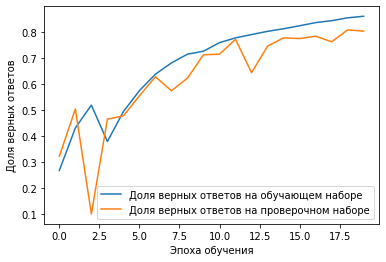

In [25]:
# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])

# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 9s 15ms/step - loss: 0.2817 - accuracy: 0.9028 - val_loss: 0.4783 - val_accuracy: 0.8528
Epoch 2/10
500/500 [==============================] - 7s 15ms/step - loss: 0.2484 - accuracy: 0.9140 - val_loss: 0.4776 - val_accuracy: 0.8541
Epoch 3/10
500/500 [==============================] - 7s 15ms/step - loss: 0.2294 - accuracy: 0.9193 - val_loss: 0.4932 - val_accuracy: 0.8540
Epoch 4/10
500/500 [==============================] - 7s 15ms/step - loss: 0.2222 - accuracy: 0.9221 - val_loss: 0.5260 - val_accuracy: 0.8572
Epoch 5/10
500/500 [==============================] - 7s 15ms/step - loss: 0.2110 - accuracy: 0.9266 - val_loss: 0.4966 - val_accuracy: 0.8529
Epoch 6/10
500/500 [==============================] - 7s 15ms/step - loss: 0.1975 - accuracy: 0.9310 - val_loss: 0.5092 - val_accuracy: 0.8558
Epoch 7/10
500/500 [==============================] - 7s 15ms/step - loss: 0.1908 - accuracy: 0.9331 - val_loss: 0.5040 - val_accuracy: 0.8560

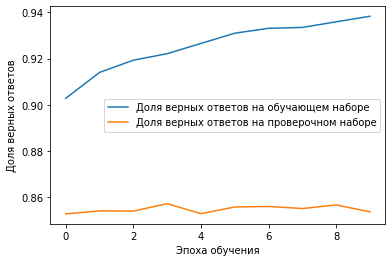

In [26]:
# Обучение с меньшим шагом
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/5
500/500 [==============================] - 9s 16ms/step - loss: 0.1513 - accuracy: 0.9460 - val_loss: 0.5503 - val_accuracy: 0.8597
Epoch 2/5
500/500 [==============================] - 7s 15ms/step - loss: 0.1484 - accuracy: 0.9477 - val_loss: 0.5684 - val_accuracy: 0.8589
Epoch 3/5
500/500 [==============================] - 7s 15ms/step - loss: 0.1526 - accuracy: 0.9448 - val_loss: 0.5565 - val_accuracy: 0.8600
Epoch 4/5
500/500 [==============================] - 7s 15ms/step - loss: 0.1543 - accuracy: 0.9455 - val_loss: 0.5838 - val_accuracy: 0.8594
Epoch 5/5
500/500 [==============================] - 7s 15ms/step - loss: 0.1556 - accuracy: 0.9455 - val_loss: 0.5460 - val_accuracy: 0.8593


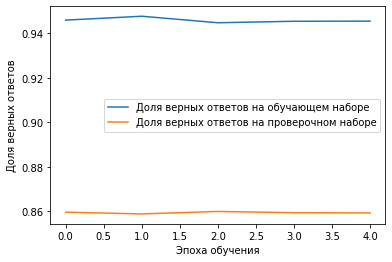

In [28]:
# Обучение с ещё меньшим шагом
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.000001), metrics=["accuracy"])

# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=5,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Лучший результат, который я смог достичь при learning_rate=0.0001 и batch_size = 100
# Epoch 5/5
# 500/500 [==============================] - 5s 10ms/step - loss: 0.0788 - accuracy: 0.9721 - val_loss: 0.7158 - val_accuracy: 0.8640